# a)

In [47]:
import gymnasium as gym
import matplotlib.pyplot as plt
import time 
import numpy as np

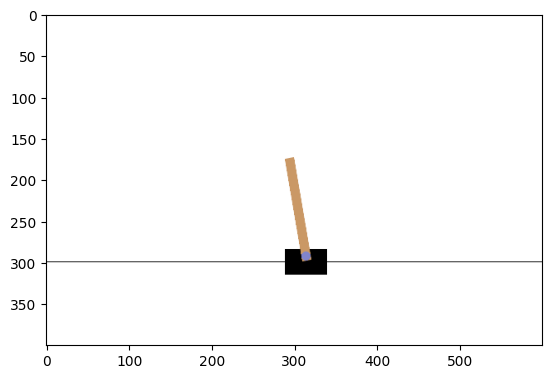

Step 0: observation = [ 0.01159984  0.17004156  0.01277825 -0.30900213], action = 1, reward = 1.0, terminated = False, truncated = False, info ={}
Step 1: observation = [ 0.01500067  0.36497912  0.00659821 -0.59762794], action = 1, reward = 1.0, terminated = False, truncated = False, info ={}
Step 2: observation = [ 0.02230025  0.16976547 -0.00535435 -0.30287394], action = 0, reward = 1.0, terminated = False, truncated = False, info ={}
Step 3: observation = [ 0.02569556  0.36496332 -0.01141183 -0.5972407 ], action = 1, reward = 1.0, terminated = False, truncated = False, info ={}
Step 4: observation = [ 0.03299483  0.56024307 -0.02335665 -0.8934963 ], action = 1, reward = 1.0, terminated = False, truncated = False, info ={}
Step 5: observation = [ 0.04419969  0.36544558 -0.04122657 -0.6082459 ], action = 0, reward = 1.0, terminated = False, truncated = False, info ={}
Step 6: observation = [ 0.0515086   0.1709235  -0.05339149 -0.32882792], action = 0, reward = 1.0, terminated = False,

In [49]:
env = gym.make("CartPole-v1", render_mode="rgb_array")
observation, info = env.reset()

episode_over = False
i = 0
observations = []
frames = []
actions = []
rewards = []
terminateds = []
truncateds = []
infos = []
while not episode_over:
    i += 1
    frame = env.render()
    frames.append(frame)
    action = env.action_space.sample()  # random action sampling
    observation, reward, terminated, truncated, info = env.step(action)
    observations.append(observation)
    actions.append(action)
    rewards.append(reward)
    terminateds.append(terminated)
    truncateds.append(truncated)
    infos.append(info)
    episode_over = terminated or truncated

for frame in frames:
    plt.imshow(frame)
    clear_output(wait=True)
    plt.show()
    time.sleep(0.01)
env.close()

for j in range(i):
    print(f"Step {j}: observation = {observations[j]}, action = {actions[j]}, reward = {rewards[j]}, terminated = {terminateds[j]}, truncated = {truncateds[j]}, info ={infos[j]}")

# b)

In [73]:
def simple_policy(observ): 
    cart_pos = observ[0]
    cart_vel = observ[1]
    tilt_angle = observ[2]
    tilt_angle_vel = observ[3]

    if tilt_angle < 0: 
        return 0 # push cart to the left 
    else: 
        return 1 # push cart to the right

def advanced_policy(observ):
    cart_pos = observ[0]
    cart_vel = observ[1]
    tilt_angle = observ[2]
    tilt_angle_vel = observ[3]

    if tilt_angle < 0 and tilt_angle_vel < 1: # push cart to the left  because angle  < 0 and vel not too big
        return 0 
    elif tilt_angle < 0 and tilt_angle_vel > 1: # push cart to the right because vel too big
        return 1
    elif tilt_angle > 0 and tilt_angle_vel > -1: # push cart to the right because angle > 0 and negative vel not too big 
        return 1
    elif tilt_angle > 0 and tilt_angle_vel < -1: # push cart to the left because neg. vel too big
        return 0 # push cart to the left

def run_and_vis_episode(display= False, policy= "S"):
    env = gym.make("CartPole-v1", render_mode="rgb_array")
    observation, info = env.reset()
    episode_over = False
    i = 0
    if display == True:
        observations = []
        frames = []
        actions = []
        rewards = []
        terminateds = []
        truncateds = []
        infos = []
        observation, _ = env.reset()
        while not episode_over:
            i += 1
            frame = env.render()
            frames.append(frame)
            if policy == "S":
                action = simple_policy(observation)    # policy defined through function 
            else:
                action = advanced_policy(observation)    # policy defined through function 
            observation, reward, terminated, truncated, info = env.step(action)
            observations.append(observation)
            actions.append(action)
            rewards.append(reward)
            terminateds.append(terminated)
            truncateds.append(truncated)
            infos.append(info)
            episode_over = terminated or truncated
        for frame in frames:
            plt.imshow(frame)
            clear_output(wait=True)
            plt.show()
            #time.sleep(0.01)
        env.close()

        for j in range(i):
            print(f"Step {j}: observation = {observations[j]}, action = {actions[j]}, reward = {rewards[j]}, terminated = {terminateds[j]}, truncated = {truncateds[j]}, info ={infos[j]}")
    else:
        while not episode_over:
            i += 1
            if policy == "S":
                action = simple_policy(observation)    # policy defined through function 
            else:
                action = advanced_policy(observation)    # policy defined through function 
            observation, reward, terminated, truncated, info = env.step(action)
            episode_over = terminated or truncated
    
    return i

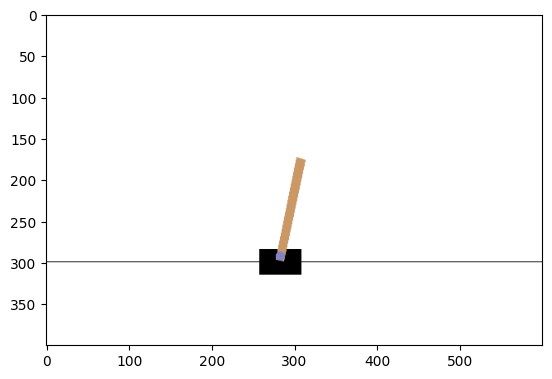

Step 0: observation = [ 0.00799073  0.24149701  0.00850021 -0.29128754], action = 1, reward = 1.0, terminated = False, truncated = False, info ={}
Step 1: observation = [ 0.01282067  0.43649673  0.00267446 -0.58127755], action = 1, reward = 1.0, terminated = False, truncated = False, info ={}
Step 2: observation = [ 0.02155061  0.6315811  -0.00895109 -0.8731168 ], action = 1, reward = 1.0, terminated = False, truncated = False, info ={}
Step 3: observation = [ 0.03418223  0.436582   -0.02641343 -0.58326143], action = 0, reward = 1.0, terminated = False, truncated = False, info ={}
Step 4: observation = [ 0.04291387  0.24183986 -0.03807866 -0.29901475], action = 0, reward = 1.0, terminated = False, truncated = False, info ={}
Step 5: observation = [ 0.04775067  0.0472808  -0.04405895 -0.01858012], action = 0, reward = 1.0, terminated = False, truncated = False, info ={}
Step 6: observation = [ 0.04869628 -0.14718251 -0.04443055  0.25988263], action = 0, reward = 1.0, terminated = False,

In [76]:
iterations = run_and_vis_episode(display=True, policy="S")
print(iterations)

In [ ]:
n = 20
m = 200
sum_s = 0
sum_a = 0
for j in range(n):
    for i in range(m):
        sum_s += run_and_vis_episode(display=False, policy="S")
        sum_a += run_and_vis_episode(display=False, policy="A")
sum_s = (sum_s/m)/n
sum_a = (sum_a/m)/n
print(f"The averaged reward over {n} runs of {m} episodes of the simple policy is= {sum_s}")
print(f"The averaged reward over {n} runs of {m} episodes of the advanced policy is= {sum_a}")

The averaged reward over 20 runs of 200 episodes of the simple policy is= 42.2605
The averaged reward over 20 runs of 200 episodes of the advanced policy is= 499.38800000000003
499.38800000000003
